In [0]:
from google.colab import files
uploaded = files.upload()

Saving nsdaq.csv to nsdaq.csv


In [0]:
import pandas as pd
import io
df = pd.read_csv('nsdaq.csv')

In [0]:
df.index = df['Date']
df = df.drop(['Date'], axis=1)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [0]:
df['lag_1'] = df.polarity.shift(1,fill_value = 0)
df['lag_2'] = df.polarity.shift(2,fill_value = 0)
df['lag_3'] = df.polarity.shift(3,fill_value = 0)
df['lag_4'] = df.polarity.shift(4,fill_value = 0)
df['lag_5'] = df.polarity.shift(5,fill_value = 0)
df['lag_6'] = df.polarity.shift(6,fill_value = 0)
df['lag_7'] = df.polarity.shift(7,fill_value = 0)
df['lag_8'] = df.polarity.shift(8,fill_value = 0)
df['lag_9'] = df.polarity.shift(9,fill_value = 0)
df['lag_10'] = df.polarity.shift(10,fill_value = 0)
df['lag_11'] = df.polarity.shift(11,fill_value = 0)
# df['lag_12'] = df.polarity.shift(12,fill_value = 0)
# df['lag_13'] = df.polarity.shift(13,fill_value = 0)
# df['lag_14'] = df.polarity.shift(14,fill_value = 0)
# df['lag_15'] = df.polarity.shift(15,fill_value = 0)
# df['lag_16'] = df.polarity.shift(16,fill_value = 0)
# df['lag_17'] = df.polarity.shift(17,fill_value = 0)
# df['lag_18'] = df.polarity.shift(18,fill_value = 0)
# df['lag_19'] = df.polarity.shift(19,fill_value = 0)
# df['lag_20'] = df.polarity.shift(20,fill_value = 0)
# df['lag_21'] = df.polarity.shift(21,fill_value = 0)
# df['lag_22'] = df.polarity.shift(22,fill_value = 0)
# df['lag_23'] = df.polarity.shift(23,fill_value = 0)
# df['lag_24'] = df.polarity.shift(24,fill_value = 0)
# df['lag_25'] = df.polarity.shift(25,fill_value = 0)


In [0]:
df = df.drop(['polarity'], axis=1)

In [0]:
df.head(10)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11
Date,,,,,,,,,,,,
2010-03-29,1961.219971,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2010-03-30,1967.959961,-1.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2010-03-31,1958.339966,-1.052632,-1.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2010-04-01,1959.560059,-1.866667,-1.052632,-1.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2010-04-05,1977.829956,-0.531250,-1.866667,-1.052632,-1.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2010-04-06,1981.949951,-1.307692,-0.531250,-1.866667,-1.052632,-1.176471,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2010-04-07,1977.300049,-1.241379,-1.307692,-0.531250,-1.866667,-1.052632,-1.176471,0.000000,0.000000,0.000000,0.0,0.0
2010-04-08,1980.729980,-1.409091,-1.241379,-1.307692,-0.531250,-1.866667,-1.052632,-1.176471,0.000000,0.000000,0.0,0.0
2010-04-09,1994.430054,-1.400000,-1.409091,-1.241379,-1.307692,-0.531250,-1.866667,-1.052632,-1.176471,0.000000,0.0,0.0


In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
dataset = df
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11]], axis=1, inplace=True)


In [0]:
# -4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18
#                                 ,-19,-20,-21,-22,-23,-24,-25

In [0]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var11(t-1)  var12(t-1)   var1(t)
1   0.077868   0.985008   0.886416  ...    0.886416    0.886416  0.080121
2   0.080121   0.340330   0.886416  ...    0.886416    0.886416  0.076905
3   0.076905   0.431784   0.385310  ...    0.886416    0.886416  0.077313
4   0.077313   0.014993   0.438058  ...    0.886416    0.886416  0.083422
5   0.083422   0.812594   0.091328  ...    0.886416    0.886416  0.084799

[5 rows x 13 columns]


In [0]:
values = reframed.values
values

array([[0.07786775, 0.9850075 , 0.88641596, ..., 0.88641596, 0.88641596,
        0.0801214 ],
       [0.0801214 , 0.34032986, 0.88641596, ..., 0.88641596, 0.88641596,
        0.07690477],
       [0.07690477, 0.43178412, 0.38530993, ..., 0.88641596, 0.88641596,
        0.07731277],
       ...,
       [0.93099964, 0.8890555 , 0.6947429 , ..., 0.35094833, 0.55783355,
        0.91373277],
       [0.91373277, 0.82308847, 0.7302379 , ..., 0.46047583, 0.35094833,
        0.9009298 ],
       [0.9009298 , 0.8185907 , 0.6655581 , ..., 0.4277112 , 0.46047583,
        0.90164876]], dtype=float32)

In [0]:
# split into train and test sets
values = reframed.values
train = values[:999, :]### can modified 
test = values[999:, :]### can modifed
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(999, 1, 12) (999,) (565, 1, 12) (565,)


Train on 999 samples, validate on 565 samples
Epoch 1/50
 - 0s - loss: 0.1730 - val_loss: 0.5828
Epoch 2/50
 - 0s - loss: 0.1208 - val_loss: 0.5007
Epoch 3/50
 - 0s - loss: 0.1343 - val_loss: 0.4873
Epoch 4/50
 - 0s - loss: 0.1351 - val_loss: 0.4918
Epoch 5/50
 - 0s - loss: 0.1307 - val_loss: 0.4876
Epoch 6/50
 - 0s - loss: 0.1269 - val_loss: 0.4766
Epoch 7/50
 - 0s - loss: 0.1243 - val_loss: 0.4639
Epoch 8/50
 - 0s - loss: 0.1220 - val_loss: 0.4515
Epoch 9/50
 - 0s - loss: 0.1199 - val_loss: 0.4399
Epoch 10/50
 - 0s - loss: 0.1172 - val_loss: 0.4276
Epoch 11/50
 - 0s - loss: 0.1143 - val_loss: 0.4139
Epoch 12/50
 - 0s - loss: 0.1112 - val_loss: 0.3987
Epoch 13/50
 - 0s - loss: 0.1079 - val_loss: 0.3819
Epoch 14/50
 - 0s - loss: 0.1043 - val_loss: 0.3636
Epoch 15/50
 - 0s - loss: 0.1005 - val_loss: 0.3439
Epoch 16/50
 - 0s - loss: 0.0963 - val_loss: 0.3225
Epoch 17/50
 - 0s - loss: 0.0920 - val_loss: 0.3002
Epoch 18/50
 - 0s - loss: 0.0868 - val_loss: 0.2753
Epoch 19/50
 - 0s - loss: 0

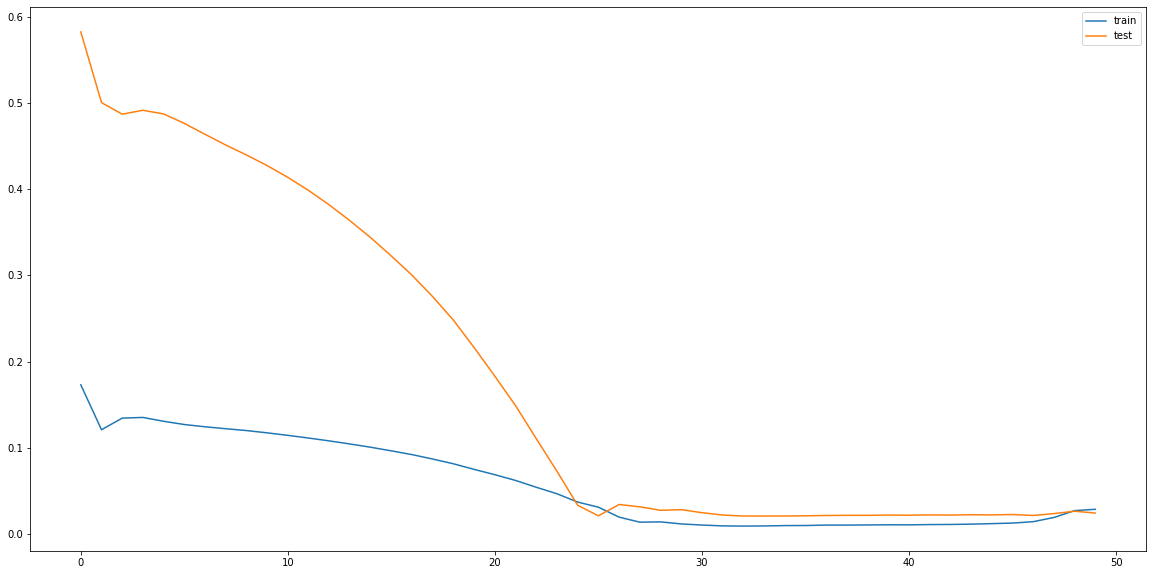

In [0]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 90.393


In [0]:
from matplotlib.pyplot import figure

In [0]:
df2= pd.read_csv('nsdaq.csv')

In [0]:
df2

,Unnamed: 0,Date,Close,polarity
0,0,2010-03-29,1961.219971,-1.176471
1,1,2010-03-30,1967.959961,-1.052632
2,2,2010-03-31,1958.339966,-1.866667
3,3,2010-04-01,1959.560059,-0.531250
4,4,2010-04-05,1977.829956,-1.307692
...,...,...,...,...
1560,1560,2016-06-08,4520.629883,-0.366667
1561,1561,2016-06-09,4512.689941,-0.518519
1562,1562,2016-06-10,4461.049805,-0.525000
1563,1563,2016-06-13,4422.759766,-0.645161


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 1.0, 'NASDAQ 100 Index From 2010 to 2016')

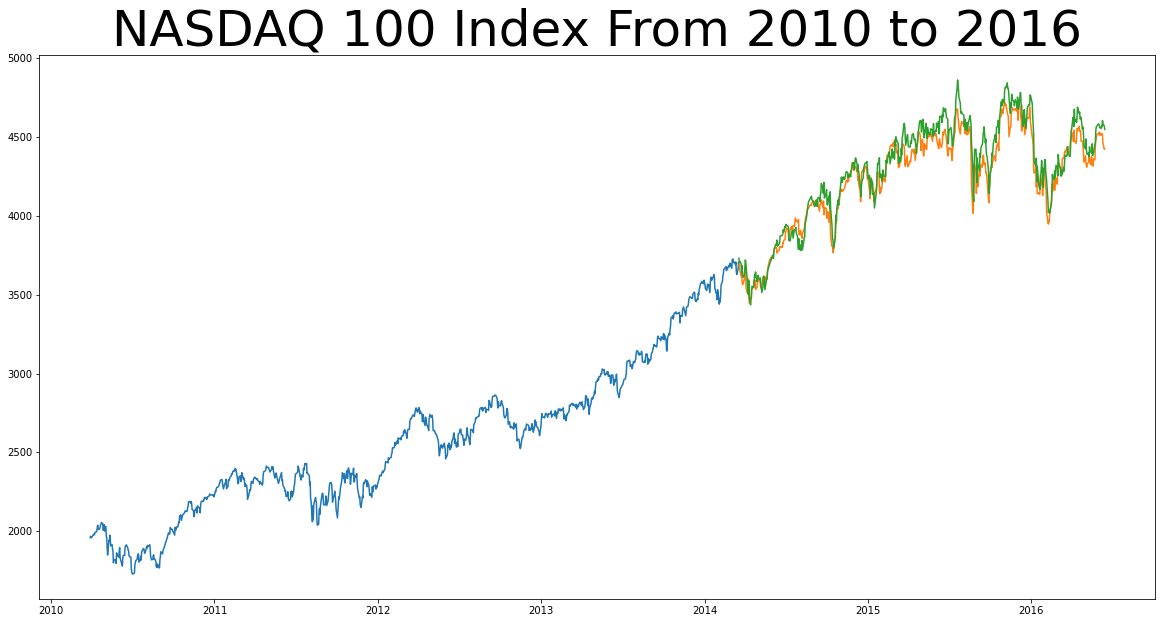

In [0]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime
from matplotlib.pylab import rcParams
from matplotlib.dates import DateFormatter

rcParams['figure.figsize'] = 20,10
df2['Date'] = pd.to_datetime(df2.Date,format='%Y-%m-%d')
df2.index = df2['Date']
train = df2[:1000]
valid = df2[1000:]
valid['Predictions'] = inv_yhat
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('NASDAQ 100 Index From 2010 to 2016', fontsize = 50)


Text(0.5, 1.0, 'NASDAQ 100 Index From 2010 to 2016')

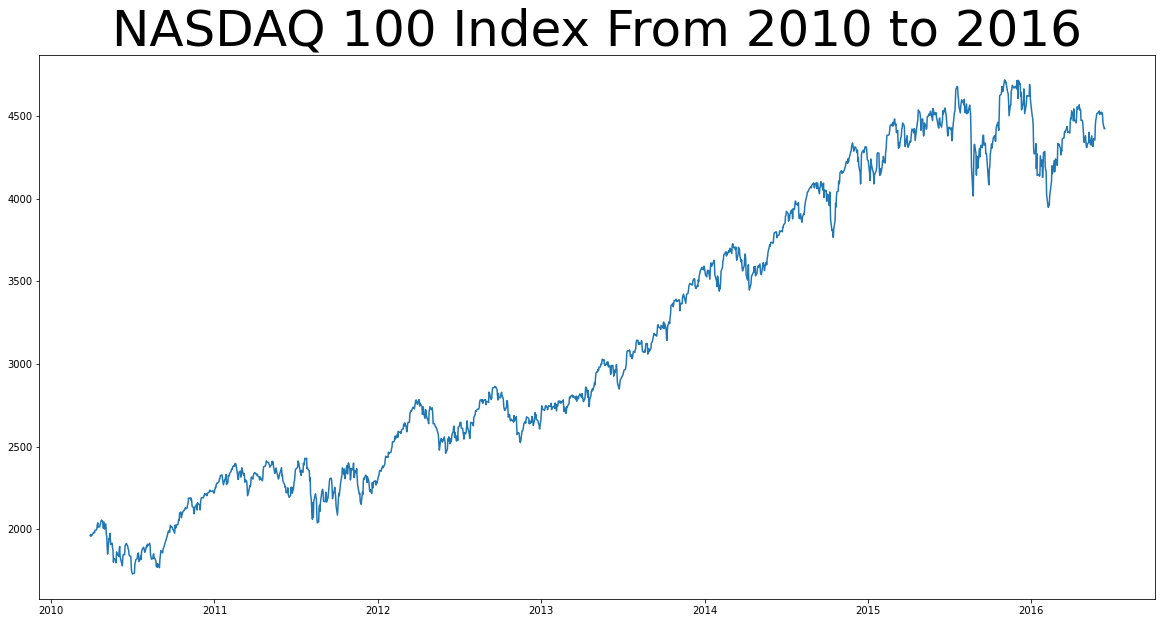

In [0]:
rcParams['figure.figsize'] = 20,10
df2['Date'] = pd.to_datetime(df2.Date,format='%Y-%m-%d')
df2.index = df2['Date']
plt.plot(df2['Close'])
plt.title('NASDAQ 100 Index From 2010 to 2016', fontsize = 50)

In [0]:
inv_y